In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import itertools
import random

In [2]:
def average_links(p,N):
    L = p*((N*(N-1))/2)
    return L

In [3]:
def average_degree(p,N):
    k = p*(N-1)
    return k    

## Questão 1 a)

Considere uma rede ER com $N=3000$ nós, conectados entre si com probabilidade $p = 0,001$.

Qual o número esperado de arestas $\langle L \rangle$?


In [4]:
average_links(0.001,3000)

4498.5

## Questão 1 b)

Considere uma rede ER com $N=3000$ nós, conectados entre si com probabilidade $p = 0,001$.

Em qual regime está a rede?

In [5]:
average_degree(0.001,3000)

2.999

Como $k > 1$, então o regime é supercrítico.

## Questão 2 a)

Gere uma rede com o modelo $G(N,p)$ e compute o grau médio $\langle k \rangle$ e número de arestas médio $\langle L \rangle$. Como a geração desse tipo de rede não é um processo determinístico, será preciso repetir o processo algumas vezes e considerar a média dos $\langle k \rangle$ e $\langle L \rangle$ obtidos. Compare os resultados simulados com o resultado esperado analiticamente. Considere $N=300$ e $L=900$.

In [6]:
def generate_random_graph_p(N, p):
    G = ig.Graph()  #creating graph
    G.add_vertices(N) #adding the number of nodes
    
    for i, j in itertools.combinations(G.vs, 2):
        r = random.random() #get a random number
        if r < p:
            G.add_edges([(i, j)]) #add the following edge
        # Do nothing if r >= p
        
    return G

In [7]:
def compute_degree_and_links(n,N,p):
    list_average_degrees = []
    list_average_links = []
    
    #generating all newtworks
    for _ in range(n):
        G = generate_random_graph_p(N,p)
        list_average_degrees.append(np.array(G.vs.degree()).mean())
        list_average_links.append(len(G.get_edgelist()))

    final_average_degrees = np.array(list_average_degrees).mean()
    final_average_links = np.array(list_average_links).mean()
    
    return final_average_degrees,final_average_links

In [8]:
n = 200 #number of iterations
N = 300 #number of nodes
p = 0.02 #probability using L and N 

degrees_rand, links_rand = compute_degree_and_links(n,N,p)

print('Simulated values')
print(f'Random Degree: {degrees_rand}')
print(f'Random Link: {links_rand}')

Simulated values
Random Degree: 5.9812666666666665
Random Link: 897.19


In [9]:
print('Analytical values')
print(f'Analytical Degree: {average_degree(0.02,300)}')
print(f'Analytical Link: {average_links(0.02,300)}')

Analytical values
Analytical Degree: 5.98
Analytical Link: 897.0


Para encontrar a probabilidade de geração randômica, basta usar o cálculo do link média $\langle L \rangle = p*(\frac{N*(N-1)}{2})$ e substituir os valores por $\langle L \rangle = 900$ e $N=300$, encontrando $p=0.02$. O número de iterações a partir de 200 se estabiliza, gerando pouca alteração no valor final. Por fim, percebe-se que ambos os métodos, tanto analítico quanto randômico se aproximam relativamente bem.

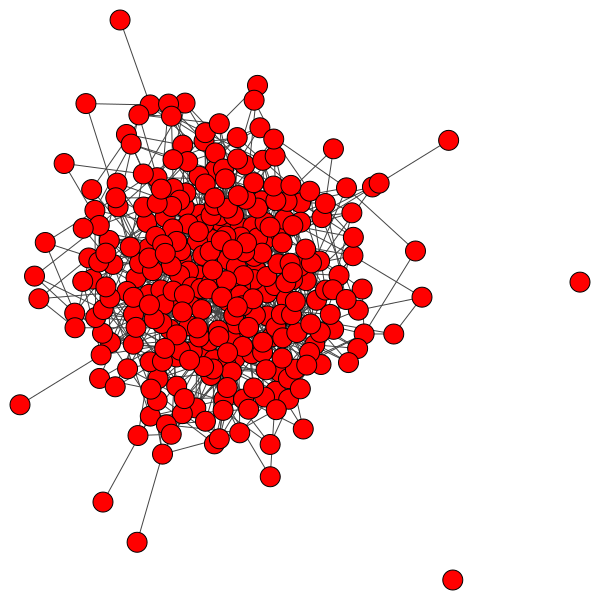

In [10]:
# testing plot
G = generate_random_graph_p(300,0.02)
ig.plot(G)

## Questão 2 b)

Baixe alguma rede real a partir das bases de dados que estudamos, gere a rede ER correspondente a ela, contendo o mesmo número de nós $N$ e arestas $L$ - $G(N,L)$, e compare as distribuições de grau. Qual o grau máximo e mínimo das duas redes? (Para obter um resultado mais fidedigno, é preciso computar o caso médio, pois a geração de redes aleatórias não é um processo determinístico).

In [11]:
# undirected unweighted representation of the
# topology of the Western States Power Grid of the United States
# http://www-personal.umich.edu/~mejn/netdata/

# reading the network file
g = ig.Graph.Read_GML('power.gml')

In [12]:
def generate_random_graph_l(N, l):
    G = ig.Graph() #creating the graph
    G.add_vertices(N)  #adding the number nodes
    
    possible_edges = itertools.combinations(G.vs, 2) #creating the all edges
    edges = random.sample(list(possible_edges),l) #getting the random sample of possible edges
    G.add_edges(edges) #add the following edge
        
    return G

In [13]:
def compute_average_degree_random_l(n,N,l):
    minimum_degree_g = []
    maximum_degree_g = []
    
    for _ in range(n):
        graph = generate_random_graph_l(N,l)  #generating the network
        minimum_degree_g.append(min(graph.vs.degree())) #get the minimum degree
        maximum_degree_g.append(graph.vs.maxdegree()) #get the maximum degree
        
    final_minimum_degree = np.array(minimum_degree_g).mean()
    final_maximum_degree = np.array(maximum_degree_g).mean()
     
    return final_minimum_degree,final_maximum_degree            

In [15]:
#generating ER network similar
nodes_g = len(g.vs) # original number of nodes
links_g = len(g.es) # original number of links
n = 200

minimum_degree, maximum_degree = compute_average_degree_random_l(n,nodes_g,links_g)

print('--Random--')
print(f'Minimum degree: {minimum_degree}')
print(f'Maximum degree: {maximum_degree}')
print('\n')
print('--Original--')
print(f'Minimum degree: {min(g.vs.degree())}')
print(f'Maximum degree: {g.vs.maxdegree()}')


--Random--
Minimum degree: 0.0
Maximum degree: 10.45


--Original--
Minimum degree: 1
Maximum degree: 19


Percebe-se que o grau mínimo e máximo da rede gerada de forma randômica não aproxima tão bem da rede original.

<AxesSubplot:title={'center':'Degree Distribution original'}, xlabel='<k>', ylabel='pk'>

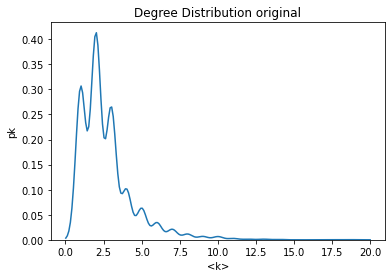

In [16]:
plt.title('Degree Distribution original')
plt.xlabel('<k>')
plt.ylabel('pk')
sns.kdeplot(g.vs.degree())

<AxesSubplot:title={'center':'Degree Distribution random'}, xlabel='<k>', ylabel='pk'>

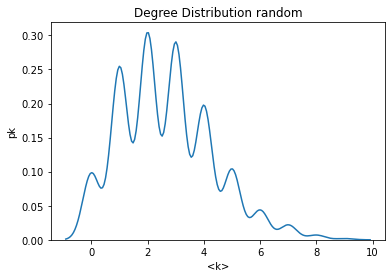

In [18]:
_g_ = generate_random_graph_l(nodes_g,links_g)
plt.title('Degree Distribution random')
plt.xlabel('<k>')
plt.ylabel('pk')
sns.kdeplot(_g_.vs.degree())

In [19]:
# testing plot
_g = generate_random_graph_l(nodes_g,links_g)
ig.plot(_g)

In [20]:
# original network
ig.plot(g)